In [2]:
noisef=0.5

In [17]:
n=1001
xx = np.linspace(0,100,n)
aa, mu, si = 1, 50, 1

In [18]:
def gauss(x, a, mu, si):
    """
    a: 最大値
    mu: 位置
    si: 線幅
    noisef: 最低値
    """
    return aa * np.exp(-(x - mu)**2 / 2 / si**2) + noisef

## 自作ガウシアンじゃなくてscipy.stats.normを使うべきでは

In [19]:
from  scipy.stats import norm

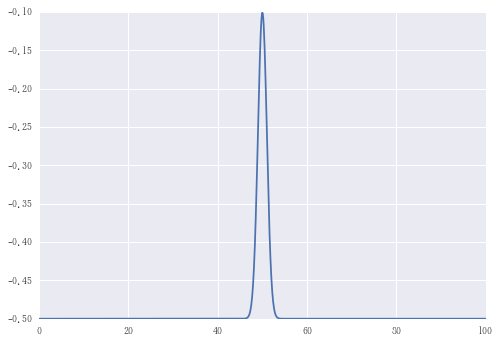

In [34]:
z=norm.pdf(xx, loc=50, scale=1)-0.5
plt.plot(xx,z)

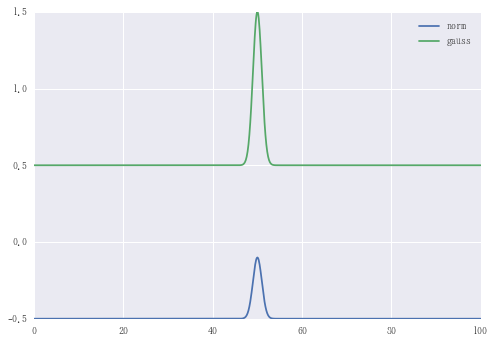

In [30]:
a, mu, si=1, 50, 1
df=pd.DataFrame([a*norm.pdf(xx, loc=mu, scale=si)-noisef, gauss(xx, a, mu, si)],
                index=['norm', 'gauss'], columns=xx)
df.T.plot()

## ガウシアンに沿ってノイズを作る

In [5]:
n=1001
xx = np.linspace(0,100,n)
aa, mu, si = 1, 50, 1

In [9]:
g = gauss(xx, aa, mu, si)
gnoise = g + 0.1 * np.random.randn(n)

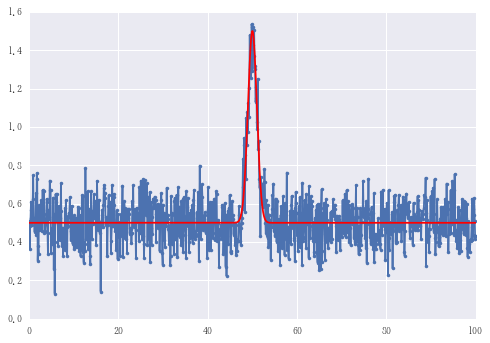

In [21]:
plt.plot(xx, gnoise, '.-')
plt.plot(xx, g,'r-' )

## カーブフィッティングをかけて、ノイズをフィッティングする

gからgnoiseを導き出したのだけれども、ここで急にgを未知の関数とみなしてしまう。
今あなたはgnoiseだけを知っていて、gのような関数を得たいとき、どうするか。

In [26]:
from scipy.optimize import curve_fit
(aa_, mu_, si_), _ = curve_fit(gauss, xx, gnoise, (aa, mu, si))
yfit = gauss(xx, aa_, mu_, si_)

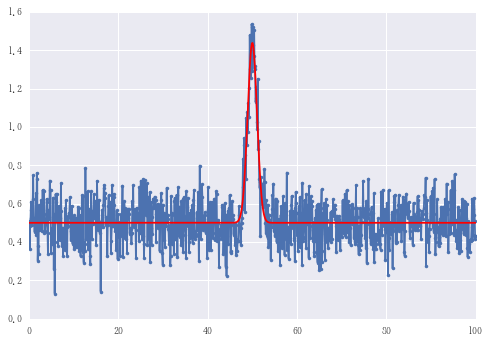

In [27]:
plt.plot(xx, gnoise, '.-')
plt.plot(xx, yfit, 'r-')  # 描いているのはgではなく、yfitであることに注意

ちゃんとフィッティングできた。

ノイズgnoiseをカーブフィットの引数に、aa_ ,

In [23]:
curve_fit(gauss, xx, g, )

# scipy.stats.normを使った場合

## ガウシアンに沿ってノイズを作る

In [19]:
from  scipy.stats import norm

In [53]:
n=1001
xx = np.linspace(0,100,n)
aa, mu, si = 5, 50, 1

In [57]:
def gauss2(x, a, mu, si):
    return a*norm.pdf(x, loc=mu, scale=si)-noisef

In [58]:
g = gauss2(xx, aa, mu, si)
gnoise = g + 0.1 * np.random.randn(n)

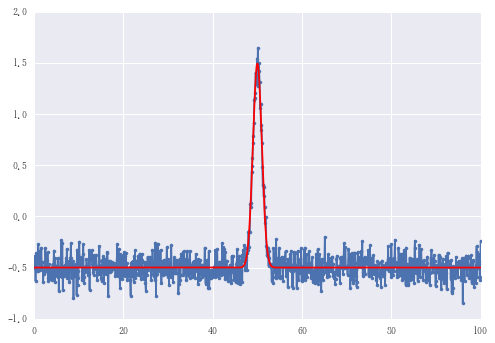

In [59]:
plt.plot(xx, gnoise, '.-')
plt.plot(xx, g,'r-' )

## カーブフィッティングをかけて、ノイズをフィッティングする

gからgnoiseを導き出したのだけれども、ここで急にgを未知の関数とみなしてしまう。
今あなたはgnoiseだけを知っていて、gのような関数を得たいとき、どうするか。

In [66]:
from scipy.optimize import curve_fit
(aa_, mu_, si_), _ = curve_fit(gauss2, xx, gnoise, (aa, mu, si))
yfit = gauss2(xx,aa_, mu_, si_)

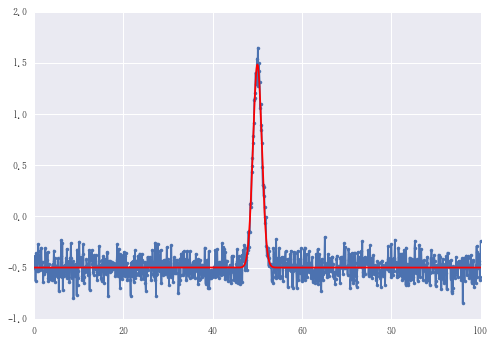

In [67]:
plt.plot(xx, gnoise, '.-')
plt.plot(xx, yfit, 'r-')  # 描いているのはgではなく、yfitであることに注意

ちゃんとフィッティングできた。

# norm vs my_gauss
normでも自作gaussでも中でnp使っているんで実行速度あんま変わらないだろうとテスト

In [73]:
%timeit gauss(xx, aa, mu, si)

The slowest run took 5.52 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 56.9 µs per loop


In [71]:
%timeit gauss2(xx, aa, mu, si)

The slowest run took 4.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 224 µs per loop


自作ガウスのほうが早い…！

# 自作ガウスをノイズのあるデータフレームにcarve_fitをapply

ランダムデータフレームの作成

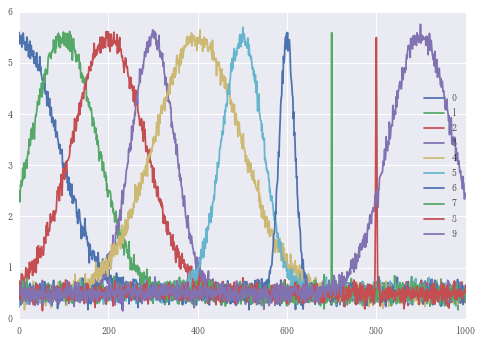

In [107]:
r=np.random.rand
df=pd.DataFrame([gauss(xx, r(), 10*_, 10*r()) + 0.1 * np.random.randn(n) for _ in range(10)]).T
df.plot()

In [108]:
df

,0,1,2,3,4,5,6,7,8,9
0,5.597369,2.491744,0.733125,0.426366,0.419702,0.227654,0.403233,0.533165,0.389243,0.483341
1,5.371493,2.283525,0.672589,0.358017,0.513576,0.348201,0.381719,0.475466,0.679071,0.472378
2,5.404454,2.408595,0.666219,0.305359,0.462288,0.508339,0.589907,0.627878,0.480787,0.534739
3,5.442112,2.614937,0.538710,0.368864,0.582577,0.654597,0.605478,0.618958,0.699994,0.654372
4,5.470499,2.577172,0.699745,0.730829,0.521940,0.470914,0.273079,0.400499,0.345927,0.656044
5,5.540406,2.702523,0.876437,0.512963,0.519345,0.581214,0.394593,0.327367,0.378928,0.540116
6,5.310536,2.602038,0.876960,0.538471,0.435745,0.516698,0.585007,0.433421,0.428050,0.582952
7,5.468482,2.680944,0.846918,0.435142,0.471336,0.615319,0.572898,0.469384,0.498061,0.309730
8,5.462557,2.936858,0.845211,0.511337,0.722132,0.492076,0.587620,0.725781,0.454297,0.537739
9,5.585699,2.722369,0.702719,0.454148,0.677273,0.575513,0.462599,0.350746,0.567357,0.466152


In [114]:
f=lambda x: curve_fit(gauss, xx, x, (aa, mu, si), maxfev = 100000000)

In [115]:
fit_param, convariance = df.apply(f)

C:\tools\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


ValueError: too many values to unpack (expected 2)

In [ ]:
fit_